<a href="https://colab.research.google.com/github/vuchicago/Keras/blob/master/dogsandcatw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os, shutil
original_dataset_dir='/content/gdrive/My Drive/dogsandcats/train1'
original_dataset_test_dir='/content/gdrive/My Drive/dogsandcats/test'
base_dir= '/content/gdrive/My Drive/dogsandcats'

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')
test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')


In [0]:
####ONLY RUN THIS ONCE TO CREATE THE PROPER FOLDERS

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [0]:
##Copy cat and dog images to relevant directories created above
###RUN ONLY ONCE

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [6]:
###SEE HOW MANY IMAGES ARE IN EACH FOLDER##########

print("total training images:",len(os.listdir(original_dataset_dir))) #25k images

print("total training cat images:",len(os.listdir(train_cats_dir))) #1k images

print("total training dog images:",len(os.listdir(train_dogs_dir))) #25k images

print("total val cat images:",len(os.listdir(validation_cats_dir))) #1k images

print("total val dog images:",len(os.listdir(validation_dogs_dir))) #1k images

total training images: 4002
total training cat images: 1000
total training dog images: 1000
total val cat images: 500
total val dog images: 500


In [7]:
##########THIS WILL TRAIN THE INPUTS ON THE VGG16 AND USE ITS OUTPUTS AS INPUTS FOR THE REST OF THE MODEL######
#########YOU CAN USE DATA AUGMENTATION FOR THIS

from keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

batch_size=20

#######################IMAGE AUGMENTATION TO CREATE NEW TRAINING EXAMPLES FROM EXISTING
#####DATA AUGMENT THE DATA page 139.  
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=.2,
                           shear_range=.2,
                           zoom_range=.2,
                           horizontal_flip=True,
                           fill_mode='nearest')


def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512)) ###create empty feature tensor
    labels=np.zeros(shape=(sample_count)) ##create empty label list
    generator=datagen.flow_from_directory(directory, target_size=(150,150),batch_size=batch_size,class_mode='binary') #create inputs and labels from directory
    
    i=0
    for inputs_batch,labels_batch in generator: 
        features_batch=conv_base.predict(inputs_batch)###PREDICT USING CONV_BASE FROM THE INPUT BATCH
        features[i*batch_size:(i+1)*batch_size]=features_batch #CREATE TENSOR OF FEATURES FROM BATCHES
        labels[i*batch_size:(i+1)*batch_size]=labels_batch 
        
        i+=1
        if i*batch_size>=sample_count:
            break #MUST BBREAK FROM GENERATED LOOP
    return features,labels

train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:

train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))


from keras import layers,models,optimizers
import time
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=(4*4*512)))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/100
2000/2000 [==============================] - 2s 823us/step - loss: 4.3018 - acc: 0.6130 - val_loss: 1.8134 - val_acc: 0.7660
Epoch 2/100
2000/2000 [==============================] - 1s 361us/step - loss: 2.8080 - acc: 0.7445 - val_loss: 1.4322 - val_acc: 0.8220
Epoch 3/100
2000/2000 [==============================] - 1s 359us/step - loss: 2.1139 - acc: 0.7855 - val_loss: 1.3113 - val_acc: 0.8470
Epoch 4/100
2000/2000 [==============================] - 1s 357us/step - loss: 1.8279 - acc: 0.8205 - val_loss: 1.2512 - val_acc: 0.8580
Epoch 5/100
2000/2000 [==============================] - 1s 362us/step - loss: 1.4875 - acc: 0.8515 - val_loss: 1.1854 - val_acc: 0.8620
Epoch 6/100
2000/2000 [==============================] - 1s 357us/step - loss: 1.1728 - acc: 0.8720 - val_loss: 1.2071 - val_acc: 0.8650
Epoch 7/100
2000/2000 [==============================] - 1s 356us/step - loss: 1.0

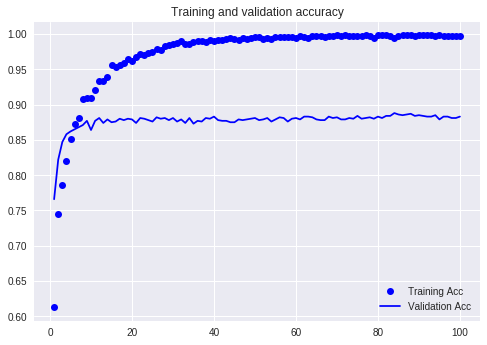

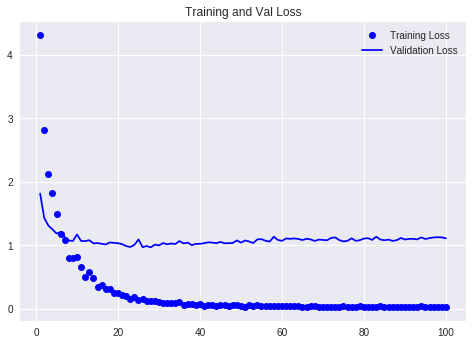

In [9]:
import numpy as np
from matplotlib import pyplot as plt
start=time.time()

history=model.fit(train_features,train_labels,epochs=100,batch_size=20,validation_data=(validation_features,validation_labels))

end=time.time()
print('this takes ',np.subtract(end,start),"seconds to run")
##PLOT THE ACCURACY AND LOSS
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label="Validation Acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label="Training Loss")
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title("Training and Val Loss")
plt.legend()

plt.show()

In [10]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

conv_base.trainable=False ###FREEZE THE VGG16 CONVOLUTIONAL BASE

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=.2,
                           shear_range=.2,
                           zoom_range=.2,
                           horizontal_flip=True,
                           fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255) ###Not using augmented data for testing


train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:

print("This is the number of trainable weights:",len(model.trainable_weights))

This is the number of trainable weights: 4


Epoch 1/50
100/100 [==============================] - 31s 310ms/step - loss: 0.3811 - acc: 0.8245 - val_loss: 0.2850 - val_acc: 0.8900
Epoch 2/50
100/100 [==============================] - 29s 289ms/step - loss: 0.3521 - acc: 0.8440 - val_loss: 0.2693 - val_acc: 0.8830
Epoch 3/50
100/100 [==============================] - 29s 289ms/step - loss: 0.3482 - acc: 0.8440 - val_loss: 0.2912 - val_acc: 0.8800
Epoch 4/50
100/100 [==============================] - 29s 289ms/step - loss: 0.3314 - acc: 0.8505 - val_loss: 0.2538 - val_acc: 0.8980
Epoch 5/50
100/100 [==============================] - 29s 289ms/step - loss: 0.3273 - acc: 0.8585 - val_loss: 0.2665 - val_acc: 0.8810
Epoch 6/50
100/100 [==============================] - 29s 289ms/step - loss: 0.3326 - acc: 0.8535 - val_loss: 0.2529 - val_acc: 0.8960
Epoch 7/50
100/100 [==============================] - 29s 289ms/step - loss: 0.3233 - acc: 0.8545 - val_loss: 0.2753 - val_acc: 0.8910
Epoch 8/50
100/100 [==============================] - 2

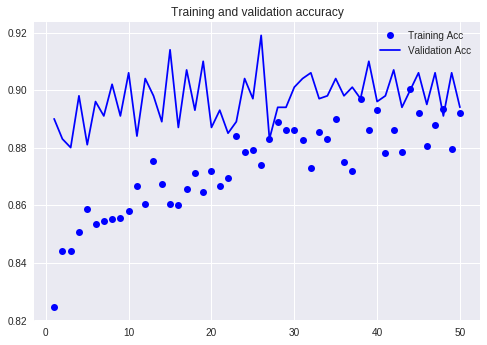

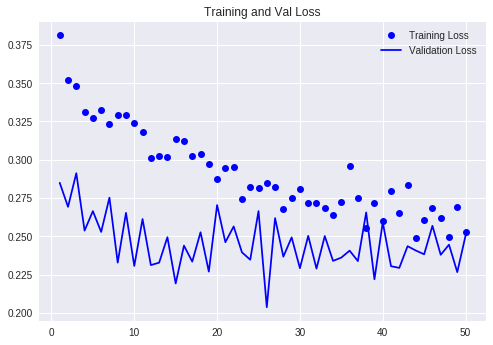

In [13]:
import time
start=time.time()
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=(validation_generator),validation_steps=50)
end=time.time()
print('this takes ',np.subtract(end,start),"seconds to run")


##PLOT THE ACCURACY AND LOSS
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label="Validation Acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label="Training Loss")
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title("Training and Val Loss")
plt.legend()

plt.show()

In [14]:
#####FINE TUNING MODEL.  LEAVE MOST OF THE PRETRAINED CONVOLUTION LAYER IN TACT EXCEPT FOR TOP LAYER

conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False
    
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

start=time.time()
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50)
end=time.time()
print("This took ",end-start," seconds to run")


Epoch 1/50
100/100 [==============================] - 33s 326ms/step - loss: 0.2818 - acc: 0.8805 - val_loss: 0.2659 - val_acc: 0.8910
Epoch 2/50
100/100 [==============================] - 30s 298ms/step - loss: 0.2557 - acc: 0.8910 - val_loss: 0.2074 - val_acc: 0.9200
Epoch 3/50
100/100 [==============================] - 30s 298ms/step - loss: 0.2274 - acc: 0.9025 - val_loss: 0.1887 - val_acc: 0.9250
Epoch 4/50
100/100 [==============================] - 30s 297ms/step - loss: 0.2041 - acc: 0.8970 - val_loss: 0.2397 - val_acc: 0.9080
Epoch 5/50
100/100 [==============================] - 30s 296ms/step - loss: 0.1943 - acc: 0.9240 - val_loss: 0.1985 - val_acc: 0.9180
Epoch 6/50
100/100 [==============================] - 30s 299ms/step - loss: 0.1812 - acc: 0.9235 - val_loss: 0.2128 - val_acc: 0.9060
Epoch 7/50
100/100 [==============================] - 30s 296ms/step - loss: 0.1880 - acc: 0.9260 - val_loss: 0.1929 - val_acc: 0.9210
Epoch 8/50
100/100 [==============================] - 3

In [15]:

####CAN FINALLY EVALUATE THE MODEL ON THE TEST DATASET
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)
print('test_acc:',test_acc)

Found 1000 images belonging to 2 classes.
test_acc: 0.9399999928474426


In [0]:
model.save("catsanddogs.h5")




In [25]:
new_model = models.load_model('catsanddogs.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [62]:
img_path='/content/gdrive/My Drive/dogsandcats/test/cats/cat.1999.jpg'
from keras.preprocessing import image
import numpy as np
img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)


(1, 150, 150, 3)


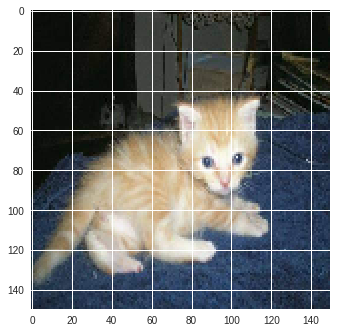

This is predicted to be a  cat  with  0.9999894956727076 confidence


In [64]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
prediction=model.predict(img_tensor)
pred=np.int(np.round(prediction))
dic={0:'cat',1:'dog'}
print("This is predicted to be a ",dic[pred]," with ",1-prediction[0][0], "confidence")

In [0]:
class car:
  def __init__(self,make, color, year):
    self.make=make
    self.color=color
    self.year=year
    

In [0]:
p1=car("Honda","red",1999)

In [0]:
print(p1.year)